# Perceptron Algorithm in Python
![alt text](neuron.jpg)
![alt text](perceptron.png)

In [1]:
import numpy as np

In [2]:
class Perceptron:
        
    def __init__(self, learning_rate = 0.01, num_of_iters = 1000):
        
        self.lr = learning_rate
        self.num_of_iters = num_of_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

   

    # Define the fit method with the training samples (X) and the training labels (y)
    def fit(self, X, y):
        
        n_samples, n_features = X.shape

        # initial parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.num_of_iters):

            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    
    
    # Define the predict method with the test samples (X)
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    
    
    # This is the activation function
    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

# Perceptron Algorithm on Randomly Generated Data

Perceptron classification accuracy 1.0


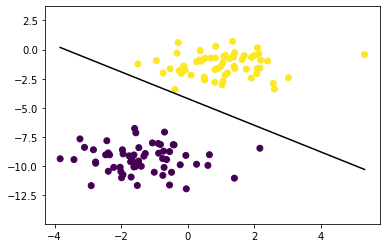

In [3]:
if __name__ == "__main__":
    
    
    
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    
    
    
    
    # This will generate two classes
    X, y = datasets.make_blobs(
        n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
    )
    
    
    # This will split the previously generated data into training samples/test samples and training labels/test labels
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    
    
    
    
    # Create a Perceptron
    p = Perceptron(learning_rate=0.01, num_of_iters=1000)
    
    # Fit the training data
    p.fit(X_train, y_train)
    
    # Predict the test labels
    predictions = p.predict(X_test)

    # Calculate the accuracy
    print("Perceptron classification accuracy", accuracy(y_test, predictions))

    
    
    
    
    # This will plot our results
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
    x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
    ax.set_ylim([ymin - 3, ymax + 3])

    plt.show()

# Perceptron Learning Algorithm on Iris Data
## As Shown in Class

In [4]:
# import the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import datasets from sklearn which contains the iris data
from sklearn import datasets

# load the iris data (specifying type as data frames)
iris = datasets.load_iris(as_frame=True)


df = iris.frame
df = df.iloc[:100]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [5]:
df_classify = df[["sepal length (cm)", "sepal width (cm)", "target"]]
df_classify["ones"] = np.ones(100)



for i in range(100):
    if df_classify["target"].iloc[i] == 0:
        df_classify["target"].iloc[i] = 1.0
    else:
        df_classify["target"].iloc[i] = -1.0
        

        
        X = df_classify[["sepal length (cm)", "sepal width (cm)", "ones"]].to_numpy()
y = df_classify["target"].to_numpy()



X[0]

<ipython-input-5-2103e3f0f757>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_classify["ones"] = np.ones(100)
C:\Users\shaya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-5-2103e3f0f757>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_classify["target"].iloc

array([5.1, 3.5, 1. ])

Text(0.5, 1.0, 'Iris Data Plot')

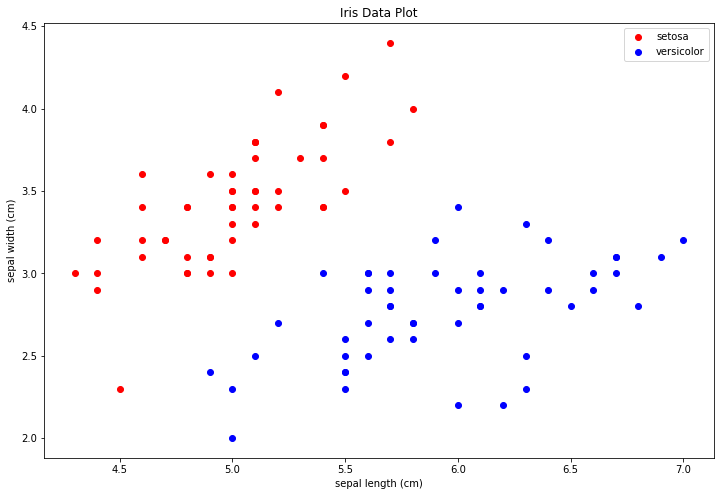

In [6]:
plt.figure(figsize = (12, 8))

plt.scatter(X[:50, 0],
            X[:50, 1], 
            label = 'setosa', 
            color = 'r')

plt.scatter(X[50:, 0], 
            X[50:, 1], 
            label = 'versicolor', 
            color = 'blue')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.title("Iris Data Plot")

In [7]:
def sign(x, y):
    # the input vectors here should be numpy arrays
    if x @ y > 0:
        return 1.0
    else:
        return -1.0
    
def L(w, features = X, labels = y):
    return sum(.5*(sign(w, x) - labels[i])**2 for i, x in enumerate(features))

w = np.random.rand(3)
print(L(w))

100.0


The Loss before implementing stochastic approx gradient descent = 100.0
The Loss after implementing stochastic approx gradient descent = 4.0


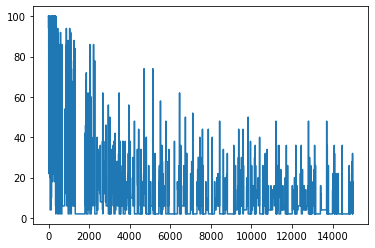

In [8]:
def grad_approx(w, x, y):
    return (sign(w,x) - y)*x

# set epochs
epochs = 5000

# set alpha
alpha = .5



w = np.random.rand(3)
print(f"The Loss before implementing stochastic approx gradient descent = {L(w)}")
losses = []
for epoch in range(epochs+10000):
    random_index = np.random.randint(100)
    w = w - alpha*grad_approx(w, X[random_index], y[random_index])
    losses.append(L(w))
print(f"The Loss after implementing stochastic approx gradient descent = {L(w)}")
plt.plot(losses)

The Loss before implementing stochastic approx gradient descent = 100.0
The Loss after implementing stochastic approx gradient descent = 0.0


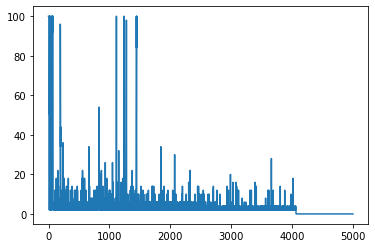

In [9]:
w = np.random.rand(3)
print(f"The Loss before implementing stochastic approx gradient descent = {L(w)}")
losses = []
batch_size = 30
for epoch in range(epochs):
    batch_grad = np.zeros(3)
    for _ in range(batch_size):
        random_index = np.random.randint(100)
        batch_grad += grad_approx(w, X[random_index], y[random_index]) 
    w = w - alpha*batch_grad
    losses.append(L(w))
print(f"The Loss after implementing stochastic approx gradient descent = {L(w)}")
plt.plot(losses)

The Loss before implementing stochastic approx gradient descent = 100.0
The Loss after implementing stochastic approx gradient descent = 0.0


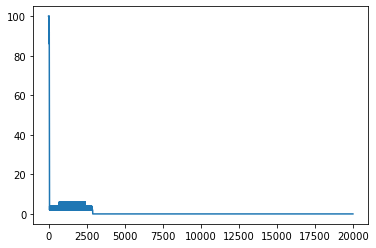

In [10]:
def full_grad_approx(w, features=X, labels=y):
    return sum((sign(w,x) - labels[i])*x for i, x in enumerate(features))


w = np.random.rand(3)
print(f"The Loss before implementing stochastic approx gradient descent = {L(w)}")
losses = []
for epoch in range(20000):
    w = w - alpha*full_grad_approx(w)
    losses.append(L(w))
print(f"The Loss after implementing stochastic approx gradient descent = {L(w)}")
plt.plot(losses)

In [11]:
w

array([-458.31087093,  587.30358885,  711.6639899 ])

Text(0.5, 1.0, 'Iris Data Plot')

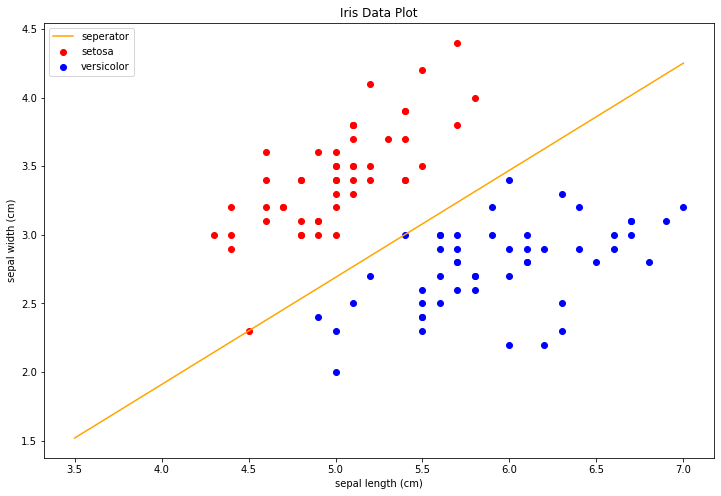

In [12]:
domain = np.arange(3.5, 7.5, .5)
line = [(w[0]*x + w[2])/-w[1] for x in domain]


plt.figure(figsize = (12, 8))

plt.scatter(X[:50, 0],
            X[:50, 1], 
            label = 'setosa', 
            color = 'r')

plt.scatter(X[50:, 0], 
            X[50:, 1], 
            label = 'versicolor', 
            color = 'blue')

plt.plot(domain, 
         line, 
         label = 'seperator', 
         color='orange')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.title("Iris Data Plot")